In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import networkx  as nx
img = imread("C:/Users/stan2/Documents/4A/Comp Imaging/MinCut-MaxFlow/dataset/images/baby_2007_007203.jpg")[50:250,280:480]
img_gt = imread("C:/Users/stan2/Documents/4A/Comp Imaging/MinCut-MaxFlow/dataset/images-gt/baby_2007_007203.png")[50:250,280:480]

img_label = imread("C:/Users/stan2/Documents/4A/Comp Imaging/MinCut-MaxFlow/dataset/images-labels/baby_2007_007203-anno.png")[50:250,280:480]

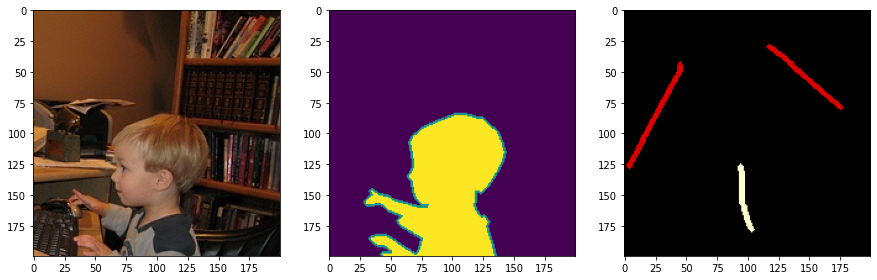

In [43]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(131)
ax1.imshow(img)
ax2 = fig.add_subplot(132)
ax2.imshow(img_gt)
ax3 = fig.add_subplot(133)
ax3.imshow(img_label)

In [2]:
from Tograph import to_graph
graph = to_graph(img, img_label)

Progress 1/4 : Creating graph...


100%|██████████| 200/200 [00:01<00:00, 139.88it/s]


40000
Progress 2/4 : Adding edges between background initializations and the sink


100%|██████████| 764/764 [00:00<00:00, 291339.96it/s]


Progress 3/4 : Adding edges between object initializations and the source


100%|██████████| 268/268 [00:00<00:00, 39152.68it/s]


Progress 4/4 : Adding edges between the rest of the nodes and the sink and source nodes


100%|██████████| 38968/38968 [00:16<00:00, 2397.90it/s]


In [25]:
from min_cut import min_cut_max_flow
min_cut_graph = min_cut_max_flow(graph.copy(), 'S', 'T')

iteration  10
iteration  20
iteration  30
iteration  40
iteration  50
iteration  60
iteration  70
iteration  80
iteration  90
iteration  100
iteration  110
iteration  120
iteration  130
iteration  140
iteration  150
iteration  160
iteration  170
iteration  180
iteration  190
iteration  200
iteration  210
iteration  220
iteration  230
iteration  240
iteration  250
iteration  260
iteration  270
iteration  280
iteration  290
iteration  300
iteration  310
iteration  320
iteration  330
iteration  340
iteration  350
iteration  360
iteration  370
iteration  380
iteration  390
iteration  400
iteration  410
iteration  420
iteration  430
iteration  440
iteration  450
iteration  460
iteration  470
iteration  480
iteration  490
iteration  500
iteration  510
iteration  520
iteration  530
iteration  540
iteration  550
iteration  560
iteration  570
iteration  580
iteration  590
iteration  600
iteration  610
iteration  620
iteration  630
iteration  640
iteration  650
iteration  660
iteration  670
iter

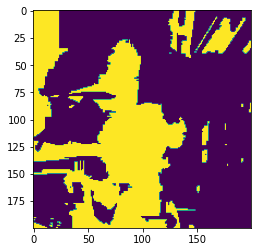

In [26]:
from min_cut import get_cut
seg = get_cut(min_cut_graph,img.shape[0],img.shape[1])
plt.imshow(seg)

In [42]:
from testing_utils import IoU
print("Boykov-Kolmogorov IoU:",IoU(seg,img_gt/255))

Boykov-Kolmogorov IoU: 0.43142627990910304


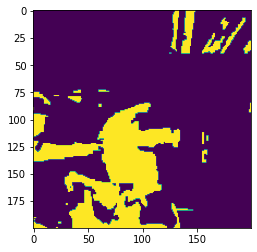

In [37]:
from min_cut import get_nx_cut
cost, nx_cut = nx.minimum_cut(graph.copy(), 'S', 'T')
nx_seg = get_nx_cut(nx_cut,img.shape[0],img.shape[1])
plt.imshow(nx_seg)

In [39]:
print("NetworkX IoU", IoU(nx_seg,img_gt/255))

NetworkX IoU 0.46787655279503104


In [18]:
dinic_cut = dinic(graph.copy(), 'S', 'T')

iteration  10
iteration  20
iteration  30
iteration  40
iteration  50
iteration  60
iteration  70
iteration  80
iteration  90
iteration  100
iteration  110
iteration  120
iteration  130
iteration  140
iteration  150
iteration  160
iteration  170
iteration  180
iteration  190
iteration  200
iteration  210
iteration  220
iteration  230
iteration  240
iteration  250
iteration  260
iteration  270
iteration  280
iteration  290
iteration  300
iteration  310
iteration  320
iteration  330
iteration  340
iteration  350
iteration  360
iteration  370
iteration  380
iteration  390
iteration  400
iteration  410
iteration  420
iteration  430
iteration  440
iteration  450
iteration  460
iteration  470
iteration  480
iteration  490
iteration  500
iteration  510
iteration  520
iteration  530
iteration  540
iteration  550
iteration  560
iteration  570
iteration  580
iteration  590
iteration  600
iteration  610
iteration  620
iteration  630
iteration  640
iteration  650
iteration  660
iteration  670
iter

KeyboardInterrupt: 

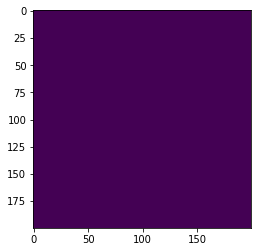

In [4]:
from min_cut import get_cut
dinic_seg = get_cut(dinic_cut,img.shape[0],img.shape[1])
plt.imshow(dinic_seg)